In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))

if project_root not in sys.path:
    sys.path.append(project_root)

In [2]:
from spectral_clustering import *
from stability_analysis import *
from parameter_fitting import *
from sklearn.datasets import make_blobs
import numpy as np

In [3]:
import warnings

warnings.filterwarnings(
    "ignore", message="KMeans is known to have a memory leak on Windows with MKL"
)

In [4]:
random_state = 1

In [5]:
parameter_grid_knn = {
    "sim_graph_type": ["knn"],
    "K": [50],  # Just a place holder, doesn't affect anything
    "sigma": [0],
    "knn": [5, 8, 10, 15, 20, 30, 40],
    "mutual_knn": [0],
    "epsilon": [0],
}

parameter_grid_eps_neighborhood = {
    "sim_graph_type": ["eps_neighbor"],
    "K": [50],  # Just a place holder, doesn't affect anything
    "sigma": [0],
    "knn": [0],
    "mutual_knn": [0],
    "epsilon": [
        0.05,
        0.1,
        0.15,
        0.2,
        0.25,
        0.3,
        0.5,
        0.75,
        1.0,
        1.25,
        1.5,
        2.0,
        4.0,
        8.0,
    ],
}

In [6]:
blobs_data, blobs_labels = make_blobs(
    n_samples=[50, 50],
    centers=[[0, 0], [1, 1]],
    cluster_std=[0.5, 0.5],
    random_state=random_state,
)

distance_matrix = get_distance_matrix_from_data(blobs_data)

In [7]:
best_params_knn = find_best_params_with_eigengap_grid_search(
    distance_matrix, param_grid=parameter_grid_knn, random_state=random_state
)
print(best_params_knn)

{'K': 50, 'epsilon': 0, 'knn': 5, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.02742981670706005
Average eigenvalue:  4.4566018043827344e-05
Estimated K:  2

{'K': 50, 'epsilon': 0, 'knn': 8, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 10, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 15, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 20, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 30, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 40, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 2, 'epsilon': 0, 'knn': 5, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}


Text(0.5, 1.0, 'Actual')

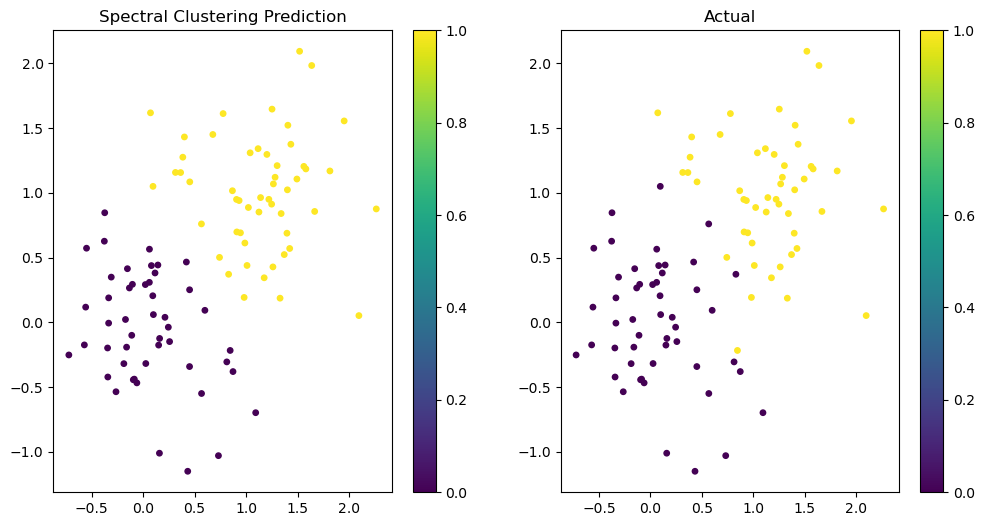

In [8]:
similarity_matrix_knn = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_knn["sim_graph_type"],
    knn=best_params_knn["knn"],
)

res_knn = Spectral_Clustering(
    similarity_matrix_knn,
    K=2,
    random_state=random_state,
)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x=blobs_data[:, 0], y=blobs_data[:, 1], c=res_knn.labels, s=15)
plt.colorbar()
plt.title("Spectral Clustering Prediction")

plt.subplot(1, 2, 2)
plt.scatter(x=blobs_data[:, 0], y=blobs_data[:, 1], c=blobs_labels, s=15)
plt.colorbar()
plt.title("Actual")

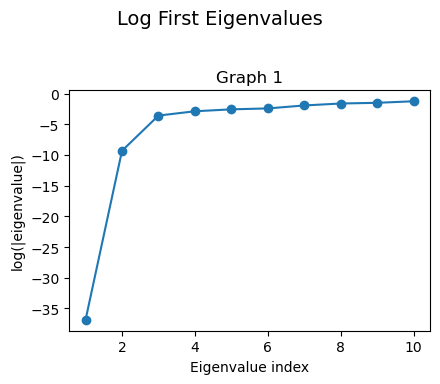

In [9]:
plot_eigenvalues([res_knn.eigenvalues])

# Add Noise to the Data and Track how Cluster Labels Change

Let us now add some noise to all data points and see how stable our clustering is

In [10]:
# TODO: Think about scaling the noise with respect to the standard deviation of the data
noise_std = 2.0

results = run_experiment(
    blobs_data,
    res_knn.labels,
    best_params_knn,
    n_runs=20,
    noise_std=noise_std,
    K=2,
    seed=random_state,
    return_all=True,
)

Runs: 20, noise_std: 2.0
Mean acc after  matching: 0.5840 ± 0.0597


# Soft Probabilities for Clusters

In [11]:
blobs_data, blobs_labels = make_blobs(
    n_samples=500, centers=3, cluster_std=0.8, random_state=random_state
)

# Apply a transformation to make the blobs anisotropic (elongated)
transformation = [[1.8, 1.5], [1.5, 0.5]]
blobs_data = np.dot(blobs_data, transformation)

distance_matrix = get_distance_matrix_from_data(blobs_data)

In [12]:
best_params_knn = find_best_params_with_eigengap_grid_search(
    distance_matrix, param_grid=parameter_grid_knn, random_state=random_state
)
print(best_params_knn)

best_params_eps_neighborhood = find_best_params_with_eigengap_grid_search(
    distance_matrix,
    param_grid=parameter_grid_eps_neighborhood,
    random_state=random_state,
)
print(best_params_eps_neighborhood)

{'K': 50, 'epsilon': 0, 'knn': 5, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0
Average eigenvalue:  1.1499503258612005e-16
Estimated K:  2

{'K': 50, 'epsilon': 0, 'knn': 8, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 10, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 15, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 20, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.020058926817085362
Average eigenvalue:  0.00015079758808651374
Estimated K:  3

{'K': 50, 'epsilon': 0, 'knn': 30, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 50, 'epsilon': 0, 'knn': 40, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
Eigengap:  0.0

{'K': 3, 'epsilon': 0, 'knn': 20, 'mutual_knn': 0, 'sigma': 0, 'sim_graph_type': 'knn'}
{'K': 50, 'epsilon': 0.05, 'knn': 0, 'mutu

Mean entropy: 4.565253770401651e-06


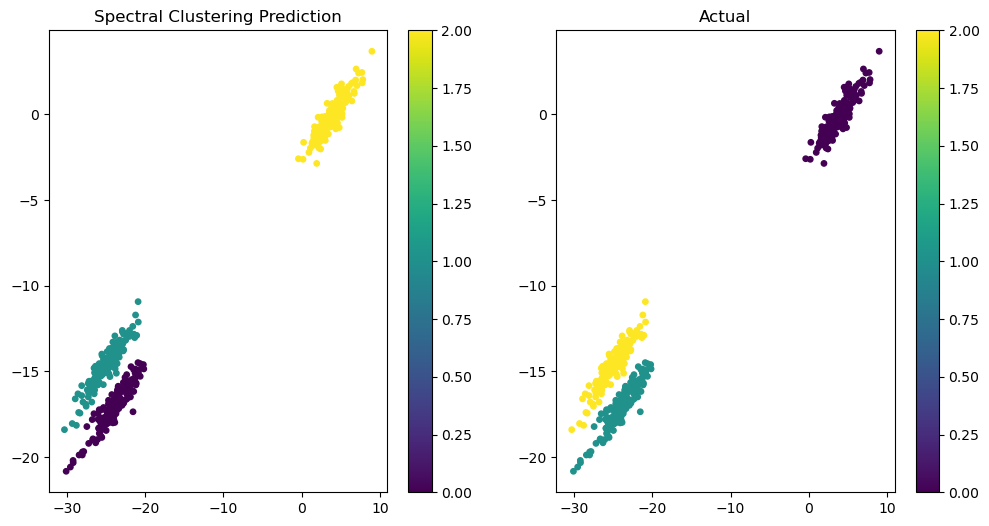

In [13]:
similarity_matrix_knn = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_knn["sim_graph_type"],
    knn=best_params_knn["knn"],
)

res_knn = Spectral_Clustering(
    similarity_matrix_knn, K=3, random_state=random_state, soft=True
)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x=blobs_data[:, 0], y=blobs_data[:, 1], c=res_knn.labels, s=15)
plt.colorbar()
plt.title("Spectral Clustering Prediction")

plt.subplot(1, 2, 2)
plt.scatter(x=blobs_data[:, 0], y=blobs_data[:, 1], c=blobs_labels, s=15)
plt.colorbar()
plt.title("Actual")

print("Mean entropy:", analyse_soft_spectral_clustering_stability(res_knn))

Mean entropy: 0.2339733213323973


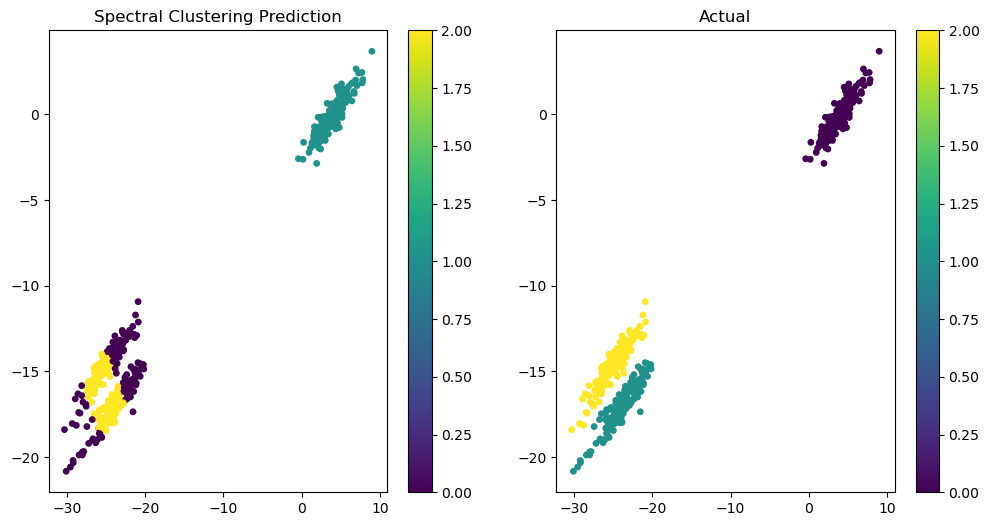

In [15]:
similarity_matrix_eps_neighborhood = get_similarity_matrix_from_distance_matrix(
    distance_matrix,
    sim_graph_type=best_params_eps_neighborhood["sim_graph_type"],
    epsilon=best_params_eps_neighborhood["epsilon"],
)

res_eps_neighborhood = Spectral_Clustering(
    similarity_matrix_eps_neighborhood, K=3, random_state=random_state, soft=True
)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x=blobs_data[:, 0], y=blobs_data[:, 1], c=res_eps_neighborhood.labels, s=15)
plt.colorbar()
plt.title("Spectral Clustering Prediction")

plt.subplot(1, 2, 2)
plt.scatter(x=blobs_data[:, 0], y=blobs_data[:, 1], c=blobs_labels, s=15)
plt.colorbar()
plt.title("Actual")

print("Mean entropy:", analyse_soft_spectral_clustering_stability(res_eps_neighborhood))